# Desafio técnico - Ser Útil

### Objetivo
* Analisar as pontuações de satisfação do cliente (CSAT) ao logo do mês de um banco de dados de um cliente da Ser Útil chamado Shopzilla;
* Gerar insights acionáveis que ajudem a Shopzilla a melhorar a satisfação do cliente.

### Etapas

#### 1. Leitura, tratamento e limpeza dos dados

In [70]:
import pandas as pd
import os

print("Arquivos no diretório:", os.listdir(os.getcwd()))

#Lendo os dados
caminho_arquivo = "Customer_support_data.csv"
dados_shopzilla = pd.read_csv(caminho_arquivo)

print(dados_shopzilla.info())

# Total de entradas no DataFrame
total_entradas = len(dados_shopzilla)

# Colunas com dados faltantes
columns = [
    'Customer Remarks', 
    'Order_id', 
    'order_date_time', 
    'Customer_City', 
    'Product_category', 
    'Item_price', 
    'connected_handling_time'
]

# Calcular a porcentagem de valores faltantes
porcentagem_faltantes = {}
for column in columns:
    non_null_count = dados_shopzilla[column].count()
    count_faltantes = total_entradas - non_null_count
    percentagem_null = (count_faltantes / total_entradas) * 100
    porcentagem_faltantes[column] = percentagem_null

# Exibir a porcentagem de valores faltantes
for column, percentage in porcentagem_faltantes.items():
    print(f"{column}: {percentage:.2f}% valores faltantes")




Arquivos no diretório: ['analise_dados_shopzilla.ipynb', 'Customer_support_data.csv', 'dados_shopzilla_clean.csv', 'Teste Prático - Analista de Dados Júnior.docx']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category    

* Analisando Os resultados acima, temos dados faltantes em 7 das 20 colunas, com as seguintes proporções:
   * Customer Remarks (Feedback fornecido pelo cliente): 66.54% valores faltantes
   * Order_id (Identificador do pedido associado à interação): 21.22% valores faltantes
   * order_date_time (Data e hora do pedido): 79.96% valores faltantes
   * Customer_City (Cidade do cliente): 80.12% valores faltantes
   * Product_category (Categoria do produto): 79.98% valores faltantes
   * Item_price (Preço do item): 79.97% valores faltantes
   * connected_handling_time (Tempo necessário para lidar com a interação): 99.72% valores faltantes

* Dessa forma, é preciso analisar as informações contidas em cada uma das colunas e as correções possíveis para limpeza ideal dos dados. 

* Para as colunas com mais de 70% de dados faltantes, tem-se data e hora do pedido (order_date_time), cidade do cliente (Customer_City), categoria dos produtos (Product_category), preço dos itens (Item_price) e tempo para lidar com a interação (connected_handling_time). Para essas colunas, a quantidade de dados disponíveis é muito pequena para análises significativas. Além disso, essas informações, embora úteis, não são críticas para a análise de satisfação do cliente. Portanto, vamos remover essas colunas do nosso banco de dados;

* Para a coluna de feedbacks dos clientes (Customer Remarks), pode-se interpretar que os valores faltantes seriam as situações em que o cliente não forneceu feedback. Portanto, substituiremos os valores faltantes por "No Remarks";

* Por fim, a coluna de Identificador do pedido (Order_id) é importante, pois relaciona as interações com pedidos específicos. Como a falta de valores da identificação do pedido não atrapalha nossas análises para satisfação do cliente, vamos apenas substituir esses valores faltantes por identificadores únicos (Missing Order_id1, Missing Order_id2, etc.). Assim, garantimos a integridade dos dados, com identificadores de pedidos diferentes, e preservamos as informações do dataset sem necessitar da exclusão de linhas e possível perda de informação.


In [71]:
# Colunas a serem removidas (mais de 70% de dados faltantes)
columns_to_drop = [
    'order_date_time', 
    'Customer_City', 
    'Product_category', 
    'Item_price', 
    'connected_handling_time'
]

# Remover colunas
dados_shopzilla_clean = dados_shopzilla.drop(columns=columns_to_drop)

# Preencher valores faltantes na coluna 'Customer Remarks' com 'No Remarks'
dados_shopzilla_clean['Customer Remarks'].fillna('No Remarks', inplace=True)

# Analisar a distribuição de valores faltantes na coluna 'Order_id'
order_id_missing_analysis = dados_shopzilla_clean[dados_shopzilla_clean['Order_id'].isnull()]

# Verificando padrões distribuição de valores faltantes por categoria e subcategoria
#print(order_id_missing_analysis.groupby(['category', 'Sub-category']).size())

# Exibir a quantidade de valores faltantes na coluna 'Order_id'
missing_order_id_count = dados_shopzilla_clean['Order_id'].isnull().sum()
print(f"Valores faltantes em 'Order_id': {missing_order_id_count} ({(missing_order_id_count / total_entradas) * 100:.2f}%)")

# Criar identificadores únicos para os valores faltantes
missing_order_ids = [f'Missing Order_id{i+1}' for i in range(missing_order_id_count)]

# Substituir os valores faltantes na coluna 'Order_id' por identificadores únicos
dados_shopzilla_clean.loc[dados_shopzilla_clean['Order_id'].isnull(), 'Order_id'] = missing_order_ids

# Verificar os resultados
print(dados_shopzilla_clean.info())
print(dados_shopzilla_clean.head())





Valores faltantes em 'Order_id': 18232 (21.22%)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unique id             85907 non-null  object
 1   channel_name          85907 non-null  object
 2   category              85907 non-null  object
 3   Sub-category          85907 non-null  object
 4   Customer Remarks      85907 non-null  object
 5   Order_id              85907 non-null  object
 6   Issue_reported at     85907 non-null  object
 7   issue_responded       85907 non-null  object
 8   Survey_response_Date  85907 non-null  object
 9   Agent_name            85907 non-null  object
 10  Supervisor            85907 non-null  object
 11  Manager               85907 non-null  object
 12  Tenure Bucket         85907 non-null  object
 13  Agent Shift           85907 non-null  object
 14  CSAT Score            85907 non-null  

In [72]:
# Verificar duplicatas em todo o DataFrame
duplicatas = dados_shopzilla_clean[dados_shopzilla_clean.duplicated()]

# Imprimir as duplicatas encontradas
print(duplicatas)

Empty DataFrame
Columns: [Unique id, channel_name, category, Sub-category, Customer Remarks, Order_id, Issue_reported at, issue_responded, Survey_response_Date, Agent_name, Supervisor, Manager, Tenure Bucket, Agent Shift, CSAT Score]
Index: []


#### 2. Análise de dados

##### - Analisando as pontuações de CSAT e identificando fatores que impactam a satisfação do cliente;

count    85907.000000
mean         4.242157
std          1.378903
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: CSAT Score, dtype: float64


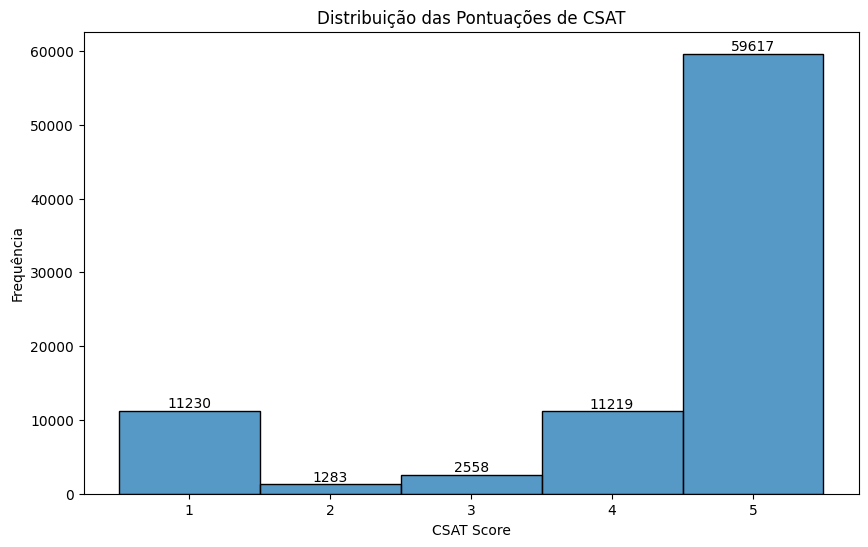

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar estatísticas descritivas das pontuações de CSAT
print(dados_shopzilla_clean['CSAT Score'].describe())

# Histograma das pontuações de CSAT
plt.figure(figsize=(10, 6))
sns.histplot(dados_shopzilla_clean['CSAT Score'], bins=range(1, 6), discrete=True)
plt.title('Distribuição das Pontuações de CSAT')
plt.xlabel('CSAT Score')
plt.ylabel('Frequência')

# Adicionar rótulos de contagem sobre cada barra
for patch in plt.gca().patches:
    height = patch.get_height()
    plt.gca().annotate(f'{height:.0f}', (patch.get_x() + patch.get_width() / 2, height), 
                       ha='center', va='bottom', fontsize=10)

plt.show()


* A maior parte das pontuações de satisfação dos clientes foi de 5, obtendo-se uma média de nota de satisfação de 4.24.

CSAT Score                     1.000000
category_Returns               0.077602
category_Payments related      0.013599
channel_name_Inbound           0.013088
channel_name_Outcall           0.009160
category_Shopzilla Related     0.008612
category_App/website           0.003689
category_Onboarding related    0.000387
category_Offers & Cashback    -0.001725
category_Refund Related       -0.002632
category_Feedback             -0.010028
category_Others               -0.019899
category_Cancellation         -0.029669
category_Product Queries      -0.031096
channel_name_Email            -0.047513
category_Order Related        -0.064475
Name: CSAT Score, dtype: float64


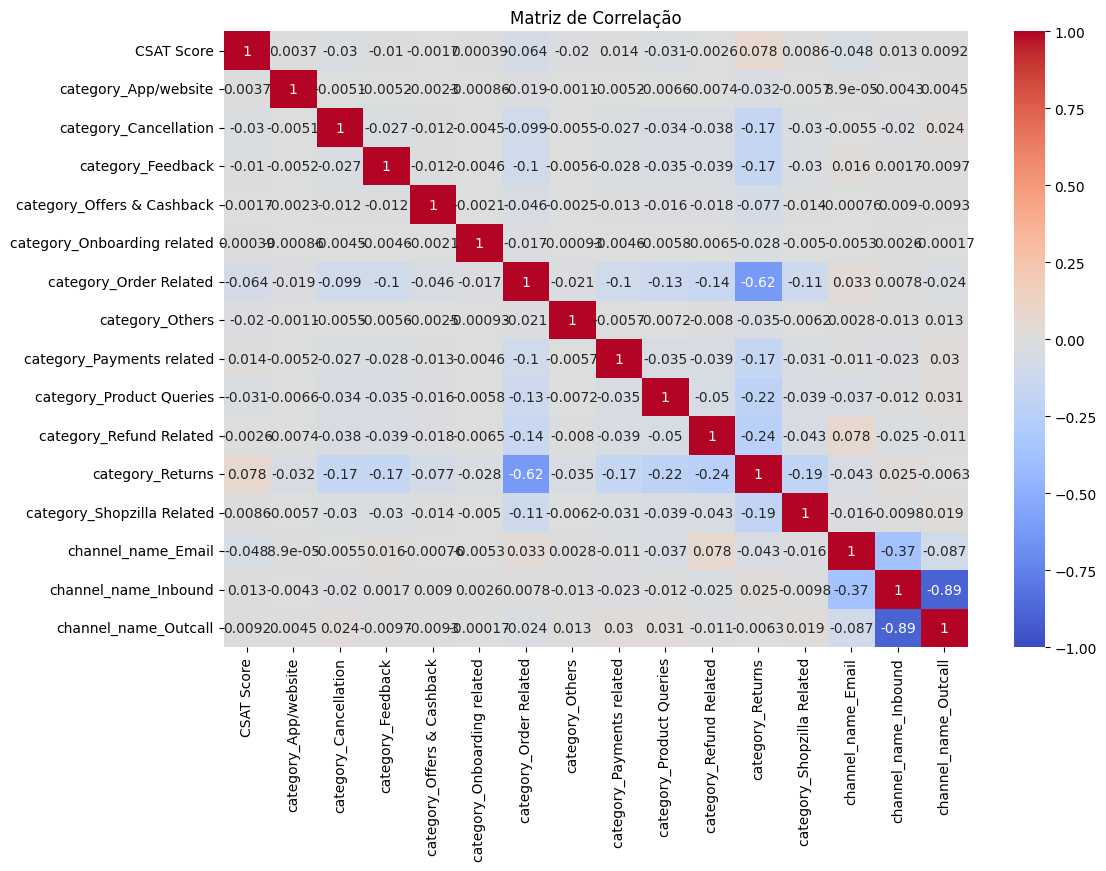

In [74]:
# Correlação entre CSAT Score e outras variáveis numéricas

#dados com variáveis numéricas e categóricas codificadas
dados_shopzilla_corr = dados_shopzilla_clean.drop(columns=['Unique id', 'Customer Remarks', 'Order_id', 
                                                           'Issue_reported at', 'issue_responded', 
                                                           'Survey_response_Date', 'Supervisor', 'Manager',
                                                           'Tenure Bucket', 'Agent Shift', 'Sub-category',
                                                           'Agent_name'])

#print(dados_shopzilla_corr.head())

dados_shopzilla_corr_final = pd.get_dummies(dados_shopzilla_corr, columns=['category','channel_name'])
#print(dados_shopzilla_corr_final.head())

#calculando correlações
correlations = dados_shopzilla_corr_final.corr()['CSAT Score'].sort_values(ascending=False)
print(correlations)

# Matriz de correlação 
plt.figure(figsize=(12, 8))
sns.heatmap(dados_shopzilla_corr_final.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()


* Nota-se que não há correlações fortes entre qualquer tipo de categoria da interação ou canal de atendimento com a pontuação de satisfação do cliente (CSAT).

C:\Users\laiza\AppData\Local\Temp\ipykernel_22480\1227665207.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CSAT Score', y='category', data=csat_por_categoria, palette='viridis')


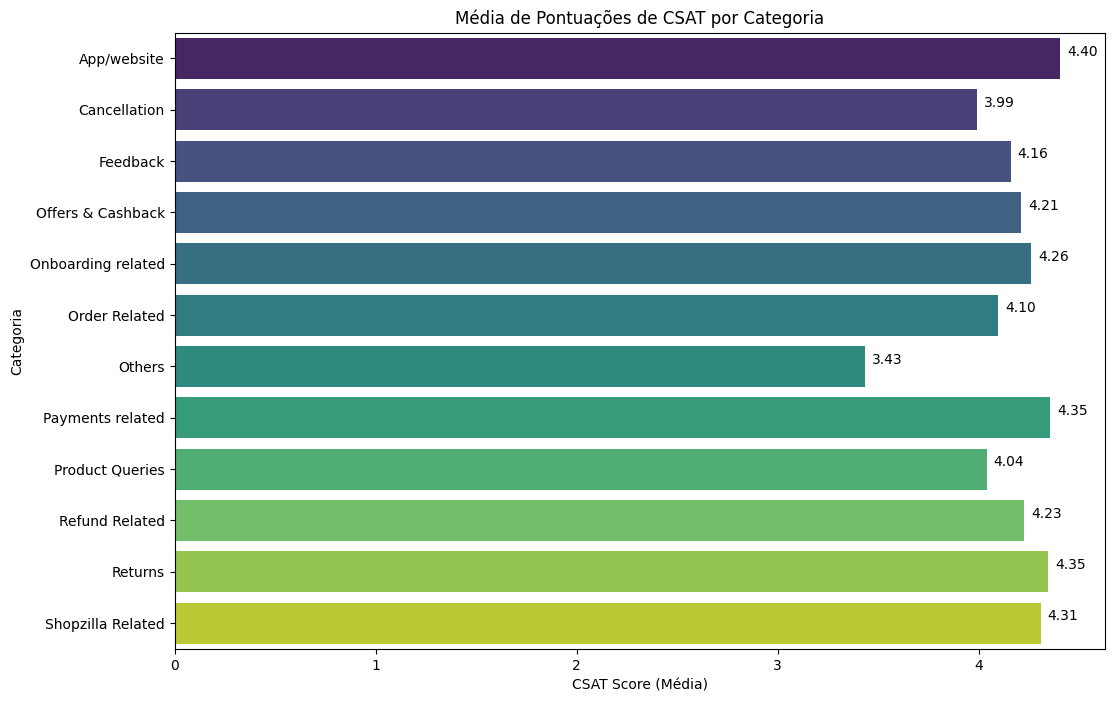

In [75]:
# Média das pontuações de CSAT por categoria
csat_por_categoria = dados_shopzilla_clean.groupby(['category'])['CSAT Score'].mean().reset_index()

# Gráfico de barras das médias de CSAT por categoria
plt.figure(figsize=(12, 8))
sns.barplot(x='CSAT Score', y='category', data=csat_por_categoria, palette='viridis')
plt.title('Média de Pontuações de CSAT por Categoria')
plt.xlabel('CSAT Score (Média)')
plt.ylabel('Categoria')

# Adicionando rótulos acima das barras
for index, row in csat_por_categoria.iterrows():
    plt.annotate(f'{row["CSAT Score"]:.2f}', 
                 xy=(row['CSAT Score'], index), 
                 xytext=(5, 5), 
                 textcoords='offset points',
                 ha='left', 
                 va='center')
plt.show()



In [76]:
# Analisar as médias de CSAT para diferentes fatores

# Canal de atendimento
canal_csat = dados_shopzilla_clean.groupby('channel_name')['CSAT Score'].mean()
maiores_canal = canal_csat.nlargest(2)
menores_canal = canal_csat.nsmallest(2)


# Categoria
categoria_csat = dados_shopzilla_clean.groupby('category')['CSAT Score'].mean()
maiores_categoria = categoria_csat.nlargest(2)
menores_categoria = categoria_csat.nsmallest(2)


# Subcategoria
subcategoria_csat = dados_shopzilla_clean.groupby('Sub-category')['CSAT Score'].mean()
maiores_subcategoria = subcategoria_csat.nlargest(2)
menores_subcategoria = subcategoria_csat.nsmallest(2)


# Experiência do agente
tenure_csat = dados_shopzilla_clean.groupby('Tenure Bucket')['CSAT Score'].mean()
maiores_tenure = tenure_csat.nlargest(2)
menores_tenure = tenure_csat.nsmallest(2)


# Turno do agente
turno_csat = dados_shopzilla_clean.groupby('Agent Shift')['CSAT Score'].mean()
maiores_turno = turno_csat.nlargest(2)
menores_turno = turno_csat.nsmallest(2)


# Imprimir os resultados
print("\nDuas maiores médias por canal de atendimento:")
print(maiores_canal)
print("\nDuas menores médias por canal de atendimento:")
print(menores_canal)

print("\nDuas maiores médias por categoria:")
print(maiores_categoria)
print("\nDuas menores médias por categoria:")
print(menores_categoria)

print("\nDuas maiores médias por subcategoria:")
print(maiores_subcategoria)
print("\nDuas menores médias por subcategoria:")
print(menores_subcategoria)

print("\nDuas maiores médias por experiência do agente (Tenure):")
print(maiores_tenure)
print("\nDuas menores médias por experiência do agente (Tenure):")
print(menores_tenure)

print("\nDuas maiores médias por turno do agente:")
print(maiores_turno)
print("\nDuas menores médias por turno do agente:")
print(menores_turno)



Duas maiores médias por canal de atendimento:
channel_name
Outcall    4.269909
Inbound    4.251372
Name: CSAT Score, dtype: float64

Duas menores médias por canal de atendimento:
channel_name
Email      3.899107
Inbound    4.251372
Name: CSAT Score, dtype: float64

Duas maiores médias por categoria:
category
App/website         4.404762
Payments related    4.354534
Name: CSAT Score, dtype: float64

Duas menores médias por categoria:
category
Others          3.434343
Cancellation    3.990506
Name: CSAT Score, dtype: float64

Duas maiores médias por subcategoria:
Sub-category
Non Order related    5.000000
Signup Issues        4.648262
Name: CSAT Score, dtype: float64

Duas menores médias por subcategoria:
Sub-category
Commission related    2.333333
Unable to Login       2.428571
Name: CSAT Score, dtype: float64

Duas maiores médias por experiência do agente (Tenure):
Tenure Bucket
61-90    4.346536
31-60    4.296185
Name: CSAT Score, dtype: float64

Duas menores médias por experiência d

* Observando os valores médios de CSAT por cada fator e analisando possíveis relações
   *  Canais de atendimento:
      * Email: 3.899107
      * Inbound: 4.251372
      * Outcall: 4.269909

   * Categorias da interação:
      * Maiores médias: 
         * App/website: 4.404762
         * Payments related: 4.354534
      * Menores médias:
         * Cancellation: 3.990506
         * Others: 3.434343
         
   * Subcategorias da interação:
      * Maiores médias: 
         * Non Order related: 5.000000
         * Signup Issues: 4.648262
      * Menores médias:
         * Unable to Login: 2.428571
         * Commission related: 2.333333

   * Período de categorização do agente:
      * Maiores médias: 
         * 61-90: 4.346536
         * 31-60: 4.296185
      * Menores médias:
         * 0-30: 4.258791
         * On Job Training: 4.145242

   * Tempo de mudança do agente:
      * Maiores médias: 
         * Split: 4.427357
         * Afternoon: 4.292295
      * Menores médias:
         * Evening: 4.276361
         * Morning: 4.189495
         


* Nota-se que alguns canais de atendimento podem estar com um desempenho melhor, talvez uma avaliação e um treinamento melhor dos atendentes para suporte ao cliente em outros canais possa elevar a satisfação do cliente;

* Algumas categorias e subcategorias são melhores avaliadas em média do que outras, isso pode ocorrer por falta de comínio ou de habilidade de interação com o cliente a respeito de alguns asusntos específicos;

* Agentes com mais tempo de treino tendem a receber em média avaliações melhores dos clientes, o que era esperado de acordo com a experiência adquirida;

* Os tempos de mudança do agente não aparentam ser um padrão, enquanto de manhã e final de tarde tem notas piores, no meio da tarde e "split" tem notas maiores de satisfação do cliente.

##### - Explorando as categorias e subcategorias de interação para descobrir padrões;


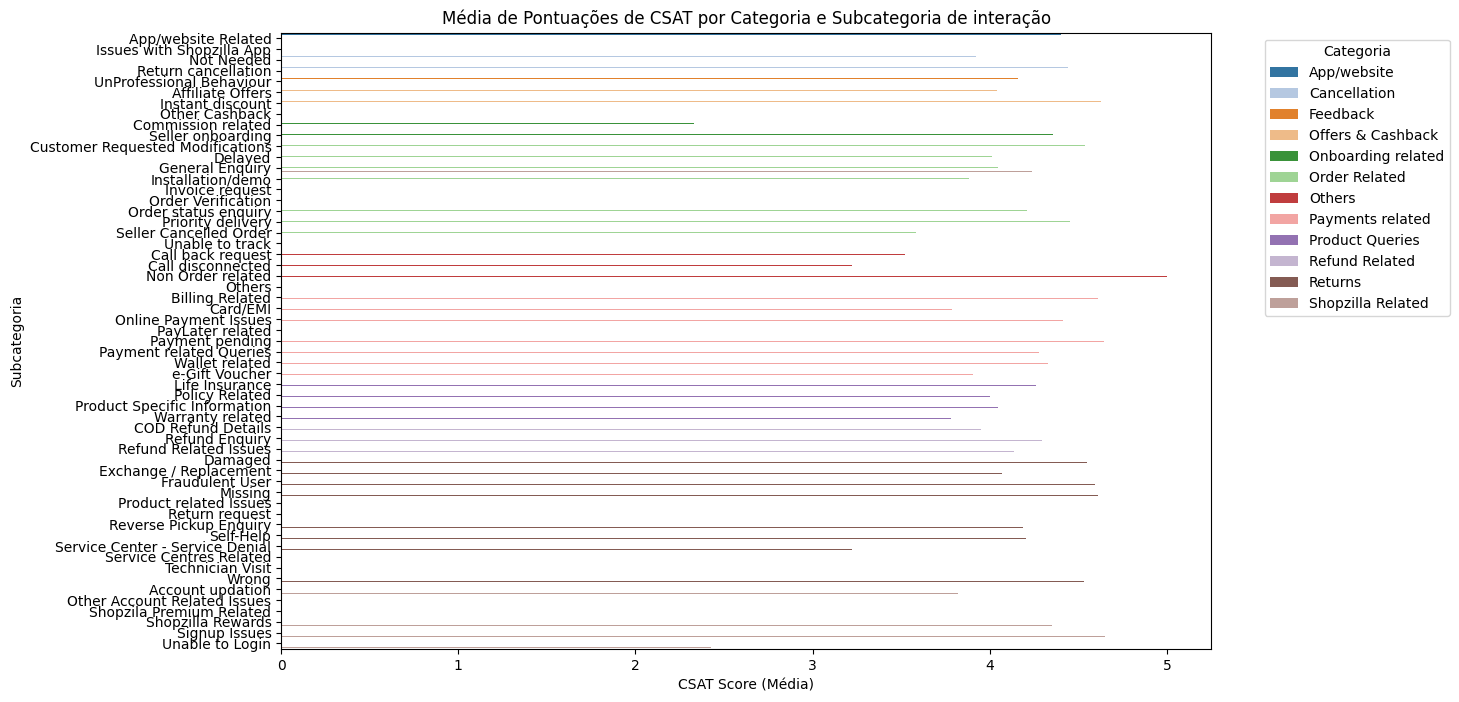

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Média das pontuações de CSAT por categoria e subcategoria
csat_por_categoria = dados_shopzilla_clean.groupby(['category', 'Sub-category'])['CSAT Score'].mean().reset_index()

# Configurar uma paleta de cores
palette = sns.color_palette("tab20", n_colors=csat_por_categoria['category'].nunique())

# Gráfico de barras das médias de CSAT por categoria e subcategoria
plt.figure(figsize=(12, 8))
sns.barplot(x='CSAT Score', y='Sub-category', hue='category', data=csat_por_categoria, palette=palette)
plt.title('Média de Pontuações de CSAT por Categoria e Subcategoria de interação')
plt.xlabel('CSAT Score (Média)')
plt.ylabel('Subcategoria')
# Posicionando a legenda fora do gráfico
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

* Analisando a relação de categorias e subcategorias, temos:
    * Mesmo dentro de categorias geralmente bem avaliadas, como Payments related, existem subcategorias com desempenho variado. Por exemplo, subcategorias como Biling Related e Payment pending apresentam desempenho superior.
    * Categorias mais gerais como Order Related ou Other mostram variabilidade maior e mais significativa entre subcategorias, indicando que algumas áreas dentro da mesma categoria podem estar funcionando melhor que outras, tendo atendimentos melhores para determinadas subcategorias de interação com o cliente.

* Essas diferenças podem ocorrer por um treinamento mais focado em determinados tipos de problemas relatados em atendimento. Assim, cabe uma análise e talvez um retreino a respeito de subcategorias com desempenho muito discrepante.

##### - Examinando o desempenho dos agentes e como eles influenciam a CSAT.

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agente
agente_csat = dados_shopzilla_clean.groupby('Agent_name')['CSAT Score'].mean()
maiores_agentes = agente_csat.nlargest(5)
menores_agentes = agente_csat.nsmallest(5)
print("\nDuas maiores médias por turno do agente:")
print(maiores_agentes)
print("\nDuas menores médias por turno do agente:")
print(menores_agentes)

# Agentes com maiores e menores médias de CSAT
maiores_agentes = dados_shopzilla_clean.groupby('Agent_name')['CSAT Score'].mean().nlargest(5)
menores_agentes = dados_shopzilla_clean.groupby('Agent_name')['CSAT Score'].mean().nsmallest(5)

# Filtrar dados originais para incluir apenas os agentes selecionados
agentes_selecionados = dados_shopzilla_clean[dados_shopzilla_clean['Agent_name'].isin(maiores_agentes.index) | dados_shopzilla_clean['Agent_name'].isin(menores_agentes.index)]

# Agrupar por agente para obter turno, experiência e média de CSAT
grupo_agentes = agentes_selecionados.groupby('Agent_name').agg({
    'Agent Shift': 'first',  # Assume que o turno é o mesmo para todos os registros do agente
    'Tenure Bucket': 'first',  # Assume que a experiência é o mesmo para todos os registros do agente
    'CSAT Score': 'mean'
}).reset_index()

# Ordenar para manter a ordem dos maiores e menores CSAT
grupo_agentes = grupo_agentes.sort_values(by='CSAT Score', ascending=False)

# Exibir o DataFrame final com os agentes selecionados
print(grupo_agentes)



Duas maiores médias por turno do agente:
Agent_name
Pamela Robinson    4.956522
Virginia Lane      4.909910
Sean Gay           4.909091
Taylor Nelson      4.888889
Anthony Sims       4.868421
Name: CSAT Score, dtype: float64

Duas menores médias por turno do agente:
Agent_name
Philip Harmon         1.809524
Rebecca Miller        1.954545
Curtis Mccarthy       2.100000
Virginia Mccormick    2.114286
Nicole Zavala         2.133333
Name: CSAT Score, dtype: float64
           Agent_name Agent Shift Tenure Bucket  CSAT Score
3     Pamela Robinson       Split           >90    4.956522
8       Virginia Lane       Split           >90    4.909910
6            Sean Gay     Morning           >90    4.909091
7       Taylor Nelson   Afternoon           >90    4.888889
0        Anthony Sims   Afternoon           >90    4.868421
2       Nicole Zavala     Morning           >90    2.133333
9  Virginia Mccormick     Morning           >90    2.114286
1     Curtis Mccarthy     Morning           >90    2.

In [81]:
print(dados_shopzilla_clean[['Issue_reported at', 'issue_responded']])

dados_shopzilla_clean['Issue_reported at'] = pd.to_datetime(dados_shopzilla_clean['Issue_reported at'], dayfirst=True)
dados_shopzilla_clean['issue_responded'] = pd.to_datetime(dados_shopzilla_clean['issue_responded'], dayfirst=True)


dados_shopzilla_clean['response_time'] = dados_shopzilla_clean['issue_responded'] - dados_shopzilla_clean['Issue_reported at']

dados_shopzilla_clean['response_time_minutes'] = dados_shopzilla_clean['response_time'].dt.total_seconds() / 60.0

print(dados_shopzilla_clean[['Issue_reported at', 'issue_responded', 'response_time', 'response_time_minutes']])


# Salvar o DataFrame como um arquivo CSV
dados_shopzilla_clean.to_csv('dados_shopzilla_clean.csv', index=False)


      Issue_reported at   issue_responded
0      01/08/2023 11:13  01/08/2023 11:47
1      01/08/2023 12:52  01/08/2023 12:54
2      01/08/2023 20:16  01/08/2023 20:38
3      01/08/2023 20:56  01/08/2023 21:16
4      01/08/2023 10:30  01/08/2023 10:32
...                 ...               ...
85902  30/08/2023 23:20  31/08/2023 07:22
85903  31/08/2023 08:15  31/08/2023 08:17
85904  31/08/2023 18:57  31/08/2023 19:02
85905  31/08/2023 19:59  31/08/2023 20:00
85906  31/08/2023 23:36  31/08/2023 23:37

[85907 rows x 2 columns]
        Issue_reported at     issue_responded   response_time  \
0     2023-08-01 11:13:00 2023-08-01 11:47:00 0 days 00:34:00   
1     2023-08-01 12:52:00 2023-08-01 12:54:00 0 days 00:02:00   
2     2023-08-01 20:16:00 2023-08-01 20:38:00 0 days 00:22:00   
3     2023-08-01 20:56:00 2023-08-01 21:16:00 0 days 00:20:00   
4     2023-08-01 10:30:00 2023-08-01 10:32:00 0 days 00:02:00   
...                   ...                 ...             ...   
85902 2023-08-3

In [82]:


# Calculando o tempo médio de resposta para os agentes selecionados
tempo_medio_atendimento = dados_shopzilla_clean.groupby('Agent_name')['response_time_minutes'].mean()

# Exibindo o tempo médio de atendimento para cada agente selecionado
print("Tempo médio de atendimento por agente:")
#print(tempo_medio_atendimento)

# Filtrando os agentes com maiores e menores médias de CSAT
maiores_agentes = dados_shopzilla_clean.groupby('Agent_name')['CSAT Score'].mean().nlargest(5)
menores_agentes = dados_shopzilla_clean.groupby('Agent_name')['CSAT Score'].mean().nsmallest(5)

# Filtrando dados originais para incluir apenas os agentes selecionados
agentes_selecionados = dados_shopzilla_clean[dados_shopzilla_clean['Agent_name'].isin(maiores_agentes.index) | dados_shopzilla_clean['Agent_name'].isin(menores_agentes.index)]

# Agrupando por agente para obter turno, experiência e média de CSAT
grupo_agentes = agentes_selecionados.groupby('Agent_name').agg({
    'Agent Shift': 'first',  # Assume que o turno é o mesmo para todos os registros do agente
    'Tenure Bucket': 'first',  # Assume que a experiência é o mesmo para todos os registros do agente
    'CSAT Score': 'mean'  # Calculando a média de CSAT
}).reset_index()

# Adicionando a coluna de tempo médio de atendimento ao DataFrame grupo_agentes
grupo_agentes['tempo_medio_atendimento'] = grupo_agentes['Agent_name'].map(tempo_medio_atendimento)

# Ordenar para manter a ordem dos maiores e menores CSAT
grupo_agentes = grupo_agentes.sort_values(by='CSAT Score', ascending=False)

# Exibindo o DataFrame final com os agentes selecionados e suas informações
print("\nGrupo de Agentes com CSAT e tempo médio de atendimento:")
print(grupo_agentes)



Tempo médio de atendimento por agente:

Grupo de Agentes com CSAT e tempo médio de atendimento:
           Agent_name Agent Shift Tenure Bucket  CSAT Score  \
3     Pamela Robinson       Split           >90    4.956522   
8       Virginia Lane       Split           >90    4.909910   
6            Sean Gay     Morning           >90    4.909091   
7       Taylor Nelson   Afternoon           >90    4.888889   
0        Anthony Sims   Afternoon           >90    4.868421   
2       Nicole Zavala     Morning           >90    2.133333   
9  Virginia Mccormick     Morning           >90    2.114286   
1     Curtis Mccarthy     Morning           >90    2.100000   
5      Rebecca Miller     Morning           >90    1.954545   
4       Philip Harmon     Morning           >90    1.809524   

   tempo_medio_atendimento  
3               231.565217  
8                32.873874  
6                24.136364  
7               -39.888889  
0               127.947368  
2               285.666667  
9      

In [ ]:
# Calcular correlação
correlation = grupo_agentes[['CSAT Score', 'tempo_medio_atendimento']].corr()
print("Correlação entre CSAT Score e Tempo Médio de Atendimento:")
print(correlation)


Correlação entre CSAT Score e Tempo Médio de Atendimento:
                         CSAT Score  tempo_medio_atendimento
CSAT Score                 1.000000                -0.529071
tempo_medio_atendimento   -0.529071                 1.000000


* A correlação entre CSAT Score e tempo médio de atendimento é de -0.529071. Isso indica uma correlação negativa moderada entre essas duas variáveis. Em outras palavras, conforme o tempo médio de atendimento aumenta, o CSAT Score tende a diminuir, e vice-versa. Isso sugere que os agentes que respondem mais rapidamente tendem a ter um CSAT Score mais alto.